# Sales Analysis

#### Import necessary libraries

In [1]:
import os
import pandas as pd

#### Reading the data from the sirectory

In [2]:
path="./Sales_Data"
files=[file for file in os.listdir(path)]
for file in files:
    print(file)

Sales_May_2019.csv
Sales_September_2019.csv
Sales_December_2019.csv
Sales_August_2019.csv
Sales_March_2019.csv
Sales_June_2019.csv
Sales_October_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_April_2019.csv
Sales_November_2019.csv
Sales_February_2019.csv


#### Merge data from each month into one CSV

In [3]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data_copy.csv", index=False)
    

#### Read in updated dataframe, Here we also show that how we can change the order of columns

In [31]:
all_data = pd.read_csv("all_data.csv")
new_order = [3,2,1,4,5,0]
all_data=all_data[all_data.columns[new_order]]
all_data.head()

,Price Each,Quantity Ordered,Product,Order Date,Purchase Address,Order ID
0,11.99,1,Wired Headphones,05/16/19 17:14,"669 2nd St, New York City, NY 10001",194095
1,3.84,1,AA Batteries (4-pack),05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",194096
2,149.99,1,27in FHD Monitor,05/24/19 11:36,"164 Madison St, New York City, NY 10001",194097
3,11.99,1,Wired Headphones,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",194098
4,2.99,2,AAA Batteries (4-pack),05/11/19 22:55,"17 Church St, Seattle, WA 98101",194099


### Clean up the data!
The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

##### Drop rows of NAN

In [30]:
# Find NAN
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
58,NaN,NaN,NaN,NaN,NaN,NaN
111,NaN,NaN,NaN,NaN,NaN,NaN
522,NaN,NaN,NaN,NaN,NaN,NaN
839,NaN,NaN,NaN,NaN,NaN,NaN
1590,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


#### Make columns correct type

##### Find "or" and delete it

In [6]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

#### Convert columns to the correct types

In [7]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])#
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])#
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


In [8]:
all_data['Month']=all_data['Order Date'].str[0:2]
all_data['Month']=all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5


### Add sales culomn

In [9]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5,11.99
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5,3.84
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5,149.99
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5,11.99
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5,5.98


Task 4: Add a city column

In [10]:
def get_city(address):
   return address.split(",")[1].strip(" ")

def get_state(address):
   return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5,11.99,New York City (NY)
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5,3.84,Dallas (TX)
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5,149.99,New York City (NY)
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5,11.99,Dallas (TX)
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5,5.98,Seattle (WA)


In [11]:
all_data.groupby("Month").sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


### Augment data with additional columns

#### Add month column

In [12]:
#all_data['Month'] = all_data['Order Date'].str[0:2]
#all_data['Month'] = all_data['Month'].astype('int32')
#all_data.head()

#### Add month column (alternative method)

In [13]:
#all_data['Month 2'] = pd.to_datetime(all_data['Order Date']).dt.month
#all_data.head()

In [14]:
#def get_city(address):
 #   return address.split(",")[1].strip(" ")

#def get_state(address):
 #   return address.split(",")[2].split(" ")[1]

#all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
#all_data.head()

## Data Exploration!

#### Question 1: What was the best month for sales? How much was earned that month? 

In [15]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')

In [16]:
all_data.groupby('Month').sum()
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5,11.99,New York City (NY)
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5,3.84,Dallas (TX)
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5,149.99,New York City (NY)
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5,11.99,Dallas (TX)
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5,5.98,Seattle (WA)
5,194100,iPhone,1,700.00,05/10/19 19:44,"81 Jefferson St, San Francisco, CA 94016",5,700.00,San Francisco (CA)
6,194101,USB-C Charging Cable,1,11.95,05/11/19 22:44,"354 Meadow St, Boston, MA 02215",5,11.95,Boston (MA)
7,194102,Lightning Charging Cable,1,14.95,05/07/19 12:49,"166 4th St, Dallas, TX 75001",5,14.95,Dallas (TX)
8,194103,27in FHD Monitor,1,149.99,05/24/19 18:28,"759 Pine St, Seattle, WA 98101",5,149.99,Seattle (WA)
9,194104,Wired Headphones,1,11.99,05/04/19 18:38,"330 1st St, Seattle, WA 98101",5,11.99,Seattle (WA)


In [17]:
results=all_data.groupby("Month").sum()

#### Question 2: What city sold the most product?

['Jan', 'Feb', 'March', 'April', 'May', 'Jun', 'July', 'Agust', 'Sep', 'Oct', 'Nov', 'Dec']


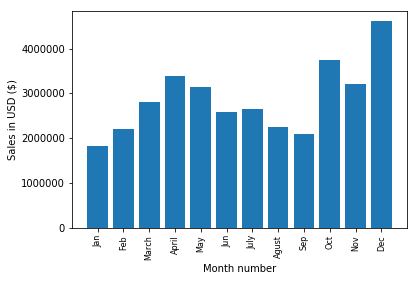

In [21]:
import matplotlib.pyplot as plt

#months = range(1,13)
months=['Jan','Feb','March', 'April','May', 'Jun', 'July', 'Agust','Sep', 'Oct','Nov', 'Dec']
print(months)

plt.bar(months,results["Sales"])
plt.xticks(months)
plt.xticks(months, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()



#### Question 2: What city had the highest number of sales

In [ ]:
results=all_data.groupby(['City']).sum()
results


In [ ]:
import matplotlib.pyplot as plt

keys = [city for city, df in all_data.groupby(['City'])]

plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('City number')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

In [ ]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.head()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [ ]:
# Add hour column

all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()


In [ ]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]

plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xlabel("Hours")
plt.ylabel("Number of sales")
#plt.xticks(keys)
plt.grid()
plt.show()

# My recommendation is slightly before 11am or 7pm

In [ ]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df.head(20)

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df.head(20)
df= df[['Order ID', 'Grouped']].drop_duplicates()
df.head()


#### Question 4: What products are most often sold together?

In [ ]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 3)))

for key,value in count.most_common(10):
    print(key, value)


#### What product sold the most? Why do you think it sold the most?

In [ ]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

In [ ]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()